In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
a = ord('а')
alphabet = ''.join([chr(i) for i in range(a, a + 32)])
open_text = open('open.txt', encoding='utf-8').read().replace('\n', '')
open_text = open_text.lower().replace('ё', 'е')
open_text = re.sub('[^а-я]', '', open_text)
key2 = 'ад'
key3 = 'окс'
key4 = 'глаз'
key5 = 'папки'
key_big = 'наногидроксоцинкат'

In [3]:
def count_letters(string):
    occurrences = {}
    for l in alphabet:
        occurrences[l] = string.count(l)
    return occurrences


def count_I(text):
    n = len(text)
    s = 0
    occurrences = count_letters(text)
    for m in occurrences.values():
        s += m * (m - 1)
    return s / (n * (n - 1))

In [4]:
def get_letter(open_l, key_l):
    return chr(ord('а') + (ord(open_l) + ord(key_l)) % len(alphabet))

def encrypt(text, key):
    encrypted = ''
    for i in range(len(text)):
        encrypted += get_letter(text[i], key[i % len(key)])
    return encrypted

In [5]:
def to_file(text, key):
    with open(f'output/r{len(key)}.txt', 'w', encoding="utf-8") as f:
        f.write(text)

In [6]:
print(f'I0 = {count_I(open_text)}')
print(open_text)

I0 = 0.04978725689699415
напнесидитведьмакзвездысчитаеткогтемраздватричетыреголовауведьмакасобачьяихвостздоровенныйголыйпятьшестьсемьигаснутзвездыавместонихнанебепоявляютсячерныедыркиихтоинужноведьмакучерездыркиснебадождикльетсяадождикснебахмараитеменьназемлерадтогдаведьмакидетнадеревнюлюдямвредитьдолговедьмаксчиталужимозольнакогтеселавдругприметилегопьяненькийпортнойахтыговоритгадипобежалзакустыкмесяцужаловатьсявылетелиззасосенкруглыймесяцзапрыгалнадведьмакомнедаетемузвездтушитьнацелитсяведьмаккогтемназвездуамесяцтуткактутизаслонитрассердилсяведьмакхвостомзакрутилмесяцноровитзацепитьиклыкиоскалилпритихловлесуамесяцнацелилсядакакхватитведьмакапозубамщелкнулсобачьейпастьюведьмакоткусилполовинуумесяцаипроглотилвзвилсямесяцущербныйсветуневзвиделукрылсязаоблакоаведьмакжалобнозавылипосыпалисьсдеревьевлисточкиуведьмакавживотепрыгаетотгрызанныймесяцжжетвертитсяюлойведьмакитакисякнетпокояпобежалкречкеибултыхнулсявводурасплескаласьсеребрянаводалегведьмакнапрохладномднекорчитсяподплываютрусалкис

In [7]:
I2 = count_I(encrypt(open_text, key2))
print(f'I2 = {I2}')
to_file(encrypt(open_text, key2), key2)

I2 = 0.04194231767647533


In [8]:
I3 = count_I(encrypt(open_text, key3))
print(f'I3 = {I3}')
to_file(encrypt(open_text, key3), key3)

I3 = 0.03770177773268964


In [9]:
I4 = count_I(encrypt(open_text, key4))
print(f'I4 = {I4}')
to_file(encrypt(open_text, key4), key4)

I4 = 0.03587928842952027


In [10]:
I5 = count_I(encrypt(open_text, key5))
print(f'I5 = {I5}')
to_file(encrypt(open_text, key5), key5)

I5 = 0.03531356483443037


In [11]:
I18 = count_I(encrypt(open_text, key_big))
print(f'I18 = {I18}')
to_file(encrypt(open_text, key_big), key_big)

I18 = 0.03370471376653757


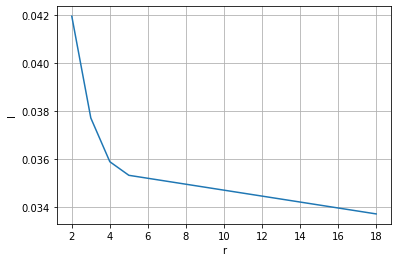

In [12]:
df = pd.DataFrame({
    'r': [2, 3, 4, 5, 18],
    'I': [I2, I3, I4, I5, I18]
})

df.to_excel('output/all_I.xlsx', index=False)


x = np.array([2, 3, 4, 5, 18])
y = np.array([I2, I3, I4, I5, I18])

plt.plot(x, y)
plt.xlabel("r")
plt.ylabel("I")
plt.grid()

plt.show()